In [1]:
#@title imports
import time
import os

from tqdm import tqdm

from cs285.scripts.run_hw1 import run_training_loop

%load_ext autoreload
%autoreload 2

c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  #@markdown expert data
  expert_policy_file = 'cs285/policies/experts/Walker2d.pkl' #@param
  expert_data = 'cs285/expert_data/expert_data_Walker2d-v4.pkl' #@param
  env_name = 'Walker2d-v4' #@param ['Ant-v4', 'Walker2d-v4', 'HalfCheetah-v4', 'Hopper-v4']
  exp_name = 'bc_Walker' #@param
  do_dagger = False #@param {type: "boolean"}
  return_log = True
  ep_len = 1000 #@param {type: "integer"}
  save_params = False #@param {type: "boolean"}

  num_agent_train_steps_per_iter = 1000 #@param {type: "integer"})
  n_iter = 1 #@param {type: "integer"})

  #@markdown batches & buffers
  # batch_size_initial = 2000 #@param {type: "integer"})
  batch_size = 1000 #@param {type: "integer"})
  eval_batch_size = 5000 #@param {type: "integer"}
  train_batch_size = 100 #@param {type: "integer"}
  max_replay_buffer_size = 1000000 #@param {type: "integer"}

  #@markdown network
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}
  learning_rate = 5e-3 #@param {type: "number"}

  #@markdown logging
  video_log_freq = -1 #@param {type: "integer"}
  scalar_log_freq = 1 #@param {type: "integer"}

  #@markdown gpu & run-time settings
  no_gpu = True #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

args = Args()

In [3]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'  # The autograder uses the prefix `q2_`
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'  # The autograder uses the prefix `q1_`
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/cs285_f2023/hw1/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

## Params Variation

In [ ]:
## Training steps
## run training
train_steps = list(range(10, 5000, 1000))
train_stats = []

for num_agent_train_steps_per_iter in tqdm(train_steps):
    args.num_agent_train_steps_per_iter = num_agent_train_steps_per_iter
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/20 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



  5%|▌         | 1/20 [00:02<00:39,  2.08s/it]

Eval_AverageReturn : 155.40643310546875
Eval_StdReturn : 195.86727905273438
Eval_MaxReturn : 902.4576416015625
Eval_MinReturn : -3.501063585281372
Eval_AverageEpLen : 100.81132075471699
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : 355.4430236816406
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.008021593093872
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 10%|█         | 2/20 [00:04<00:42,  2.37s/it]

Eval_AverageReturn : 393.3200378417969
Eval_StdReturn : 567.2047119140625
Eval_MaxReturn : 3374.6220703125
Eval_MinReturn : 1.4324886798858643
Eval_AverageEpLen : 130.66666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -320.08258056640625
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.555910348892212
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 15%|█▌        | 3/20 [00:07<00:46,  2.71s/it]

Eval_AverageReturn : 529.3538818359375
Eval_StdReturn : 612.4749145507812
Eval_MaxReturn : 2456.20166015625
Eval_MinReturn : 2.9646944999694824
Eval_AverageEpLen : 162.19354838709677
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -431.42120361328125
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.112936019897461
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 20%|██        | 4/20 [00:11<00:51,  3.22s/it]

Eval_AverageReturn : 2268.908203125
Eval_StdReturn : 2079.83935546875
Eval_MaxReturn : 5152.76171875
Eval_MinReturn : 2.3170104026794434
Eval_AverageEpLen : 490.4166666666667
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -501.48016357421875
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.997530937194824
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 25%|██▌       | 5/20 [00:16<00:54,  3.66s/it]

Eval_AverageReturn : 1769.7431640625
Eval_StdReturn : 1711.18798828125
Eval_MaxReturn : 5191.7255859375
Eval_MinReturn : 201.74098205566406
Eval_AverageEpLen : 386.42857142857144
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -692.0855712890625
Train_EnvstepsSoFar : 0
TimeSinceStart : 4.42212986946106
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 30%|███       | 6/20 [00:21<00:57,  4.14s/it]

Eval_AverageReturn : 2764.856689453125
Eval_StdReturn : 1487.457275390625
Eval_MaxReturn : 5279.5234375
Eval_MinReturn : 229.4114227294922
Eval_AverageEpLen : 567.4
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -715.7493896484375
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.05194354057312
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 35%|███▌      | 7/20 [00:26<00:59,  4.59s/it]

Eval_AverageReturn : 4494.5263671875
Eval_StdReturn : 1049.5281982421875
Eval_MaxReturn : 5292.24609375
Eval_MinReturn : 2539.090576171875
Eval_AverageEpLen : 879.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -746.4373779296875
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.514355659484863
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 40%|████      | 8/20 [00:32<01:00,  5.05s/it]

Eval_AverageReturn : 4321.17919921875
Eval_StdReturn : 1812.7025146484375
Eval_MaxReturn : 5157.748046875
Eval_MinReturn : 268.08795166015625
Eval_AverageEpLen : 852.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -754.26904296875
Train_EnvstepsSoFar : 0
TimeSinceStart : 6.004055738449097
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 45%|████▌     | 9/20 [00:39<01:00,  5.52s/it]

Eval_AverageReturn : 5199.53564453125
Eval_StdReturn : 67.50287628173828
Eval_MaxReturn : 5297.93505859375
Eval_MinReturn : 5085.59521484375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -742.4134521484375
Train_EnvstepsSoFar : 0
TimeSinceStart : 6.552837610244751
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 50%|█████     | 10/20 [00:46<01:00,  6.10s/it]

Eval_AverageReturn : 2779.609375
Eval_StdReturn : 2043.1318359375
Eval_MaxReturn : 5345.56787109375
Eval_MinReturn : 191.57177734375
Eval_AverageEpLen : 565.2
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -684.05419921875
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.3664610385894775
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 55%|█████▌    | 11/20 [00:54<00:59,  6.66s/it]

Eval_AverageReturn : 4556.849609375
Eval_StdReturn : 1277.169189453125
Eval_MaxReturn : 5258.6494140625
Eval_MinReturn : 1711.0067138671875
Eval_AverageEpLen : 898.1666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -712.3558349609375
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.923894166946411
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 60%|██████    | 12/20 [01:03<00:58,  7.29s/it]

Eval_AverageReturn : 4363.1162109375
Eval_StdReturn : 1811.802001953125
Eval_MaxReturn : 5325.56640625
Eval_MinReturn : 2.721536874771118
Eval_AverageEpLen : 836.5714285714286
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -800.534423828125
Train_EnvstepsSoFar : 0
TimeSinceStart : 8.714111804962158
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 65%|██████▌   | 13/20 [01:12<00:54,  7.74s/it]

Eval_AverageReturn : 5308.38671875
Eval_StdReturn : 33.20667266845703
Eval_MaxReturn : 5352.72509765625
Eval_MinReturn : 5269.4287109375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -857.887939453125
Train_EnvstepsSoFar : 0
TimeSinceStart : 8.757907629013062
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 70%|███████   | 14/20 [01:22<00:51,  8.56s/it]

Eval_AverageReturn : 4123.0654296875
Eval_StdReturn : 1323.392578125
Eval_MaxReturn : 5308.1357421875
Eval_MinReturn : 2064.41650390625
Eval_AverageEpLen : 805.2857142857143
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -679.4332885742188
Train_EnvstepsSoFar : 0
TimeSinceStart : 10.45004391670227
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 75%|███████▌  | 15/20 [01:33<00:45,  9.14s/it]

Eval_AverageReturn : 5210.3515625
Eval_StdReturn : 35.45050048828125
Eval_MaxReturn : 5258.8505859375
Eval_MinReturn : 5153.3427734375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -866.5432739257812
Train_EnvstepsSoFar : 0
TimeSinceStart : 10.460635662078857
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 80%|████████  | 16/20 [01:44<00:38,  9.73s/it]

Eval_AverageReturn : 5261.81298828125
Eval_StdReturn : 29.784948348999023
Eval_MaxReturn : 5315.2900390625
Eval_MinReturn : 5223.69140625
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -872.2847900390625
Train_EnvstepsSoFar : 0
TimeSinceStart : 11.081984043121338
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 85%|████████▌ | 17/20 [01:56<00:31, 10.42s/it]

Eval_AverageReturn : 4268.6083984375
Eval_StdReturn : 1147.5225830078125
Eval_MaxReturn : 5291.20703125
Eval_MinReturn : 2858.56201171875
Eval_AverageEpLen : 827.2857142857143
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -862.1350708007812
Train_EnvstepsSoFar : 0
TimeSinceStart : 12.001358985900879
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 90%|█████████ | 18/20 [02:09<00:22, 11.16s/it]

Eval_AverageReturn : 4538.82958984375
Eval_StdReturn : 1079.8970947265625
Eval_MaxReturn : 5311.74365234375
Eval_MinReturn : 2619.14501953125
Eval_AverageEpLen : 872.8333333333334
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -965.2959594726562
Train_EnvstepsSoFar : 0
TimeSinceStart : 12.886945962905884
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 95%|█████████▌| 19/20 [02:22<00:11, 11.96s/it]

Eval_AverageReturn : 5129.8955078125
Eval_StdReturn : 208.37734985351562
Eval_MaxReturn : 5236.13330078125
Eval_MinReturn : 4664.693359375
Eval_AverageEpLen : 982.5
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -914.4866943359375
Train_EnvstepsSoFar : 0
TimeSinceStart : 13.784232139587402
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 20/20 [02:37<00:00,  7.87s/it]

Eval_AverageReturn : 4440.54638671875
Eval_StdReturn : 1118.8212890625
Eval_MaxReturn : 5385.2421875
Eval_MinReturn : 2652.2021484375
Eval_AverageEpLen : 849.5714285714286
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -832.394775390625
Train_EnvstepsSoFar : 0
TimeSinceStart : 14.40542721748352
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




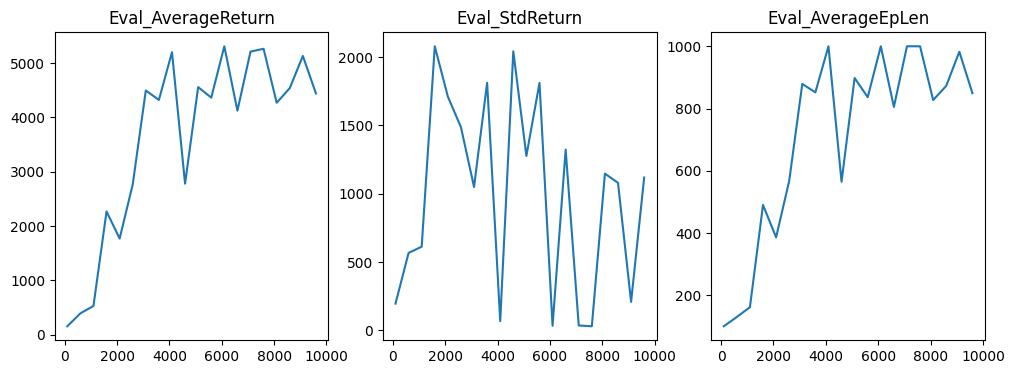

In [21]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

In [25]:
## max_replay_buffer_size 
## run training
train_steps = list(range(100, 1100, 200))
train_stats = []

args.num_agent_train_steps_per_iter = 1000

for max_replay_buffer_size in tqdm(train_steps):
    args.max_replay_buffer_size = max_replay_buffer_size
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  100

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 20%|██        | 1/5 [00:03<00:12,  3.03s/it]

Eval_AverageReturn : 563.3716430664062
Eval_StdReturn : 490.684814453125
Eval_MaxReturn : 1009.0709228515625
Eval_MinReturn : 4.334049701690674
Eval_AverageEpLen : 572.5555555555555
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -1545.0626220703125
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.0181009769439697
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  300

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 40%|████      | 2/5 [00:06<00:09,  3.04s/it]

Eval_AverageReturn : 906.273193359375
Eval_StdReturn : 184.3600311279297
Eval_MaxReturn : 1100.86572265625
Eval_MinReturn : 583.9436645507812
Eval_AverageEpLen : 844.1666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -927.1453247070312
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.0297012329101562
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  500

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 60%|██████    | 3/5 [00:09<00:06,  3.02s/it]

Eval_AverageReturn : 1118.004150390625
Eval_StdReturn : 59.52165985107422
Eval_MaxReturn : 1227.7939453125
Eval_MinReturn : 1048.634033203125
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -678.6651000976562
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.9735419750213623
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  700

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 80%|████████  | 4/5 [00:11<00:02,  2.97s/it]

Eval_AverageReturn : 1200.84326171875
Eval_StdReturn : 31.410322189331055
Eval_MaxReturn : 1222.491943359375
Eval_MinReturn : 1139.7130126953125
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -633.9902954101562
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.8880367279052734
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  900

Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

Eval_AverageReturn : 2423.0732421875
Eval_StdReturn : 259.63958740234375
Eval_MaxReturn : 2809.87841796875
Eval_MinReturn : 2015.832275390625
Eval_AverageEpLen : 993.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -493.3962097167969
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.2577247619628906
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




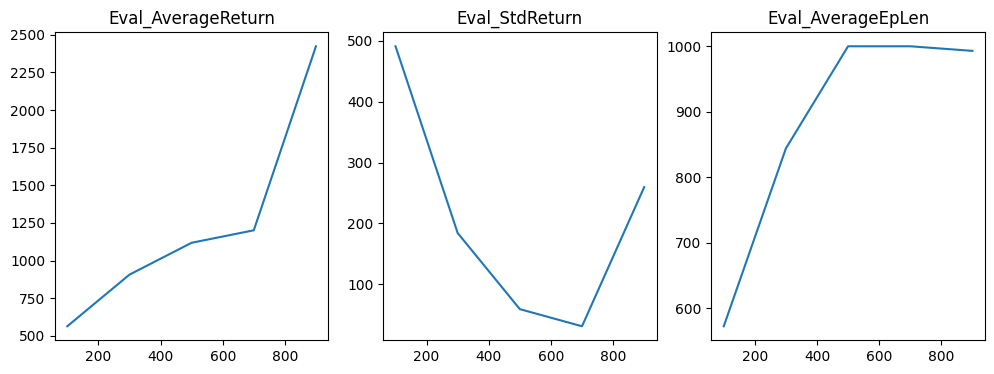

In [26]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

In [ ]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'  # The autograder uses the prefix `q2_`
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'  # The autograder uses the prefix `q1_`
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/cs285_f2023/hw1/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

## Params Variation

In [ ]:
## Training steps
## run training
train_steps = list(range(10, 5000, 1000))
train_stats = []

for num_agent_train_steps_per_iter in tqdm(train_steps):
    args.num_agent_train_steps_per_iter = num_agent_train_steps_per_iter
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/20 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



  5%|▌         | 1/20 [00:02<00:39,  2.08s/it]

Eval_AverageReturn : 155.40643310546875
Eval_StdReturn : 195.86727905273438
Eval_MaxReturn : 902.4576416015625
Eval_MinReturn : -3.501063585281372
Eval_AverageEpLen : 100.81132075471699
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : 355.4430236816406
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.008021593093872
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 10%|█         | 2/20 [00:04<00:42,  2.37s/it]

Eval_AverageReturn : 393.3200378417969
Eval_StdReturn : 567.2047119140625
Eval_MaxReturn : 3374.6220703125
Eval_MinReturn : 1.4324886798858643
Eval_AverageEpLen : 130.66666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -320.08258056640625
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.555910348892212
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 15%|█▌        | 3/20 [00:07<00:46,  2.71s/it]

Eval_AverageReturn : 529.3538818359375
Eval_StdReturn : 612.4749145507812
Eval_MaxReturn : 2456.20166015625
Eval_MinReturn : 2.9646944999694824
Eval_AverageEpLen : 162.19354838709677
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -431.42120361328125
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.112936019897461
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 20%|██        | 4/20 [00:11<00:51,  3.22s/it]

Eval_AverageReturn : 2268.908203125
Eval_StdReturn : 2079.83935546875
Eval_MaxReturn : 5152.76171875
Eval_MinReturn : 2.3170104026794434
Eval_AverageEpLen : 490.4166666666667
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -501.48016357421875
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.997530937194824
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 25%|██▌       | 5/20 [00:16<00:54,  3.66s/it]

Eval_AverageReturn : 1769.7431640625
Eval_StdReturn : 1711.18798828125
Eval_MaxReturn : 5191.7255859375
Eval_MinReturn : 201.74098205566406
Eval_AverageEpLen : 386.42857142857144
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -692.0855712890625
Train_EnvstepsSoFar : 0
TimeSinceStart : 4.42212986946106
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 30%|███       | 6/20 [00:21<00:57,  4.14s/it]

Eval_AverageReturn : 2764.856689453125
Eval_StdReturn : 1487.457275390625
Eval_MaxReturn : 5279.5234375
Eval_MinReturn : 229.4114227294922
Eval_AverageEpLen : 567.4
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -715.7493896484375
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.05194354057312
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 35%|███▌      | 7/20 [00:26<00:59,  4.59s/it]

Eval_AverageReturn : 4494.5263671875
Eval_StdReturn : 1049.5281982421875
Eval_MaxReturn : 5292.24609375
Eval_MinReturn : 2539.090576171875
Eval_AverageEpLen : 879.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -746.4373779296875
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.514355659484863
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 40%|████      | 8/20 [00:32<01:00,  5.05s/it]

Eval_AverageReturn : 4321.17919921875
Eval_StdReturn : 1812.7025146484375
Eval_MaxReturn : 5157.748046875
Eval_MinReturn : 268.08795166015625
Eval_AverageEpLen : 852.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -754.26904296875
Train_EnvstepsSoFar : 0
TimeSinceStart : 6.004055738449097
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 45%|████▌     | 9/20 [00:39<01:00,  5.52s/it]

Eval_AverageReturn : 5199.53564453125
Eval_StdReturn : 67.50287628173828
Eval_MaxReturn : 5297.93505859375
Eval_MinReturn : 5085.59521484375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -742.4134521484375
Train_EnvstepsSoFar : 0
TimeSinceStart : 6.552837610244751
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 50%|█████     | 10/20 [00:46<01:00,  6.10s/it]

Eval_AverageReturn : 2779.609375
Eval_StdReturn : 2043.1318359375
Eval_MaxReturn : 5345.56787109375
Eval_MinReturn : 191.57177734375
Eval_AverageEpLen : 565.2
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -684.05419921875
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.3664610385894775
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 55%|█████▌    | 11/20 [00:54<00:59,  6.66s/it]

Eval_AverageReturn : 4556.849609375
Eval_StdReturn : 1277.169189453125
Eval_MaxReturn : 5258.6494140625
Eval_MinReturn : 1711.0067138671875
Eval_AverageEpLen : 898.1666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -712.3558349609375
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.923894166946411
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 60%|██████    | 12/20 [01:03<00:58,  7.29s/it]

Eval_AverageReturn : 4363.1162109375
Eval_StdReturn : 1811.802001953125
Eval_MaxReturn : 5325.56640625
Eval_MinReturn : 2.721536874771118
Eval_AverageEpLen : 836.5714285714286
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -800.534423828125
Train_EnvstepsSoFar : 0
TimeSinceStart : 8.714111804962158
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 65%|██████▌   | 13/20 [01:12<00:54,  7.74s/it]

Eval_AverageReturn : 5308.38671875
Eval_StdReturn : 33.20667266845703
Eval_MaxReturn : 5352.72509765625
Eval_MinReturn : 5269.4287109375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -857.887939453125
Train_EnvstepsSoFar : 0
TimeSinceStart : 8.757907629013062
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 70%|███████   | 14/20 [01:22<00:51,  8.56s/it]

Eval_AverageReturn : 4123.0654296875
Eval_StdReturn : 1323.392578125
Eval_MaxReturn : 5308.1357421875
Eval_MinReturn : 2064.41650390625
Eval_AverageEpLen : 805.2857142857143
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -679.4332885742188
Train_EnvstepsSoFar : 0
TimeSinceStart : 10.45004391670227
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 75%|███████▌  | 15/20 [01:33<00:45,  9.14s/it]

Eval_AverageReturn : 5210.3515625
Eval_StdReturn : 35.45050048828125
Eval_MaxReturn : 5258.8505859375
Eval_MinReturn : 5153.3427734375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -866.5432739257812
Train_EnvstepsSoFar : 0
TimeSinceStart : 10.460635662078857
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 80%|████████  | 16/20 [01:44<00:38,  9.73s/it]

Eval_AverageReturn : 5261.81298828125
Eval_StdReturn : 29.784948348999023
Eval_MaxReturn : 5315.2900390625
Eval_MinReturn : 5223.69140625
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -872.2847900390625
Train_EnvstepsSoFar : 0
TimeSinceStart : 11.081984043121338
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 85%|████████▌ | 17/20 [01:56<00:31, 10.42s/it]

Eval_AverageReturn : 4268.6083984375
Eval_StdReturn : 1147.5225830078125
Eval_MaxReturn : 5291.20703125
Eval_MinReturn : 2858.56201171875
Eval_AverageEpLen : 827.2857142857143
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -862.1350708007812
Train_EnvstepsSoFar : 0
TimeSinceStart : 12.001358985900879
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 90%|█████████ | 18/20 [02:09<00:22, 11.16s/it]

Eval_AverageReturn : 4538.82958984375
Eval_StdReturn : 1079.8970947265625
Eval_MaxReturn : 5311.74365234375
Eval_MinReturn : 2619.14501953125
Eval_AverageEpLen : 872.8333333333334
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -965.2959594726562
Train_EnvstepsSoFar : 0
TimeSinceStart : 12.886945962905884
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



 95%|█████████▌| 19/20 [02:22<00:11, 11.96s/it]

Eval_AverageReturn : 5129.8955078125
Eval_StdReturn : 208.37734985351562
Eval_MaxReturn : 5236.13330078125
Eval_MinReturn : 4664.693359375
Eval_AverageEpLen : 982.5
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -914.4866943359375
Train_EnvstepsSoFar : 0
TimeSinceStart : 13.784232139587402
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 20/20 [02:37<00:00,  7.87s/it]

Eval_AverageReturn : 4440.54638671875
Eval_StdReturn : 1118.8212890625
Eval_MaxReturn : 5385.2421875
Eval_MinReturn : 2652.2021484375
Eval_AverageEpLen : 849.5714285714286
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -832.394775390625
Train_EnvstepsSoFar : 0
TimeSinceStart : 14.40542721748352
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




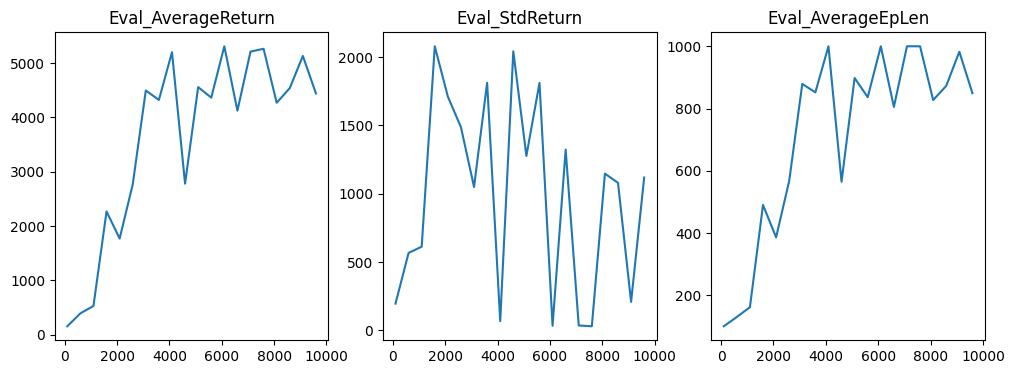

In [ ]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

In [ ]:
## max_replay_buffer_size 
## run training
train_steps = list(range(100, 1100, 200))
train_stats = []

args.num_agent_train_steps_per_iter = 1000

for max_replay_buffer_size in tqdm(train_steps):
    args.max_replay_buffer_size = max_replay_buffer_size
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  100

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 20%|██        | 1/5 [00:03<00:12,  3.03s/it]

Eval_AverageReturn : 563.3716430664062
Eval_StdReturn : 490.684814453125
Eval_MaxReturn : 1009.0709228515625
Eval_MinReturn : 4.334049701690674
Eval_AverageEpLen : 572.5555555555555
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -1545.0626220703125
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.0181009769439697
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  300

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 40%|████      | 2/5 [00:06<00:09,  3.04s/it]

Eval_AverageReturn : 906.273193359375
Eval_StdReturn : 184.3600311279297
Eval_MaxReturn : 1100.86572265625
Eval_MinReturn : 583.9436645507812
Eval_AverageEpLen : 844.1666666666666
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -927.1453247070312
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.0297012329101562
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  500

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 60%|██████    | 3/5 [00:09<00:06,  3.02s/it]

Eval_AverageReturn : 1118.004150390625
Eval_StdReturn : 59.52165985107422
Eval_MaxReturn : 1227.7939453125
Eval_MinReturn : 1048.634033203125
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -678.6651000976562
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.9735419750213623
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  700

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 80%|████████  | 4/5 [00:11<00:02,  2.97s/it]

Eval_AverageReturn : 1200.84326171875
Eval_StdReturn : 31.410322189331055
Eval_MaxReturn : 1222.491943359375
Eval_MinReturn : 1139.7130126953125
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -633.9902954101562
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.8880367279052734
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  900

Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

Eval_AverageReturn : 2423.0732421875
Eval_StdReturn : 259.63958740234375
Eval_MaxReturn : 2809.87841796875
Eval_MinReturn : 2015.832275390625
Eval_AverageEpLen : 993.0
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -493.3962097167969
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.2577247619628906
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




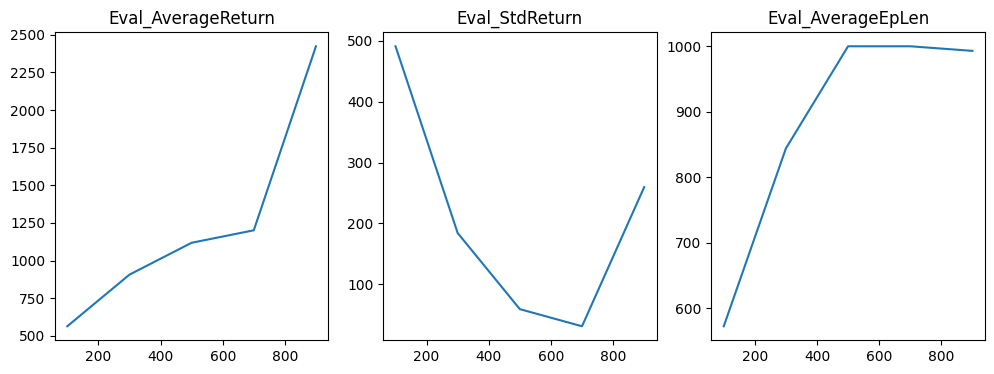

In [ ]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

In [27]:
## max_replay_buffer_size 
## run training

#  n_layers = 2 #@param {type: "integer"}
#  size = 64 #@param {type: "integer"}
#  learning_rate = 5e-3 #@param {type: "number"}

train_steps = list(range(2, 19, 4))
train_stats = []

args.num_agent_train_steps_per_iter = 1000
args.max_replay_buffer_size = 1000

for n_layers in tqdm(train_steps):
    args.n_layers = n_layers
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 20%|██        | 1/5 [00:02<00:11,  2.95s/it]

Eval_AverageReturn : 284.7142333984375
Eval_StdReturn : 262.9906921386719
Eval_MaxReturn : 1743.7911376953125
Eval_MinReturn : 184.85079956054688
Eval_AverageEpLen : 115.36363636363636
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -481.56695556640625
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.937880277633667
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 40%|████      | 2/5 [00:07<00:11,  3.84s/it]

Eval_AverageReturn : 281.6464538574219
Eval_StdReturn : 285.2863464355469
Eval_MaxReturn : 1703.450927734375
Eval_MinReturn : 1.2728904485702515
Eval_AverageEpLen : 113.8
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -495.83502197265625
Train_EnvstepsSoFar : 0
TimeSinceStart : 4.448134422302246
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 60%|██████    | 3/5 [00:13<00:09,  4.66s/it]

Eval_AverageReturn : 245.5122528076172
Eval_StdReturn : 101.0478286743164
Eval_MaxReturn : 555.4884033203125
Eval_MinReturn : -0.2350473403930664
Eval_AverageEpLen : 135.43243243243242
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -132.89549255371094
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.627521514892578
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 80%|████████  | 4/5 [00:20<00:05,  5.80s/it]

Eval_AverageReturn : 152.24661254882812
Eval_StdReturn : 92.05296325683594
Eval_MaxReturn : 318.133544921875
Eval_MinReturn : 11.61864185333252
Eval_AverageEpLen : 132.35897435897436
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : 527.59423828125
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.527050256729126
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 5/5 [00:28<00:00,  5.73s/it]

Eval_AverageReturn : 4.69918155670166
Eval_StdReturn : 7.240569591522217
Eval_MaxReturn : 55.18497085571289
Eval_MinReturn : -6.694841384887695
Eval_AverageEpLen : 24.84158415841584
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : 807.9322509765625
Train_EnvstepsSoFar : 0
TimeSinceStart : 8.027181625366211
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




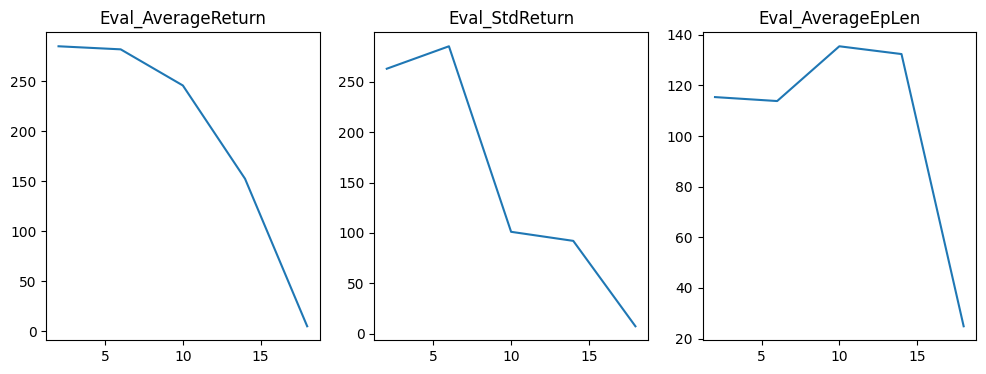

In [28]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

In [29]:
## max_replay_buffer_size 
## run training

#  n_layers = 2 #@param {type: "integer"}
#  size = 64 #@param {type: "integer"}
#  learning_rate = 5e-3 #@param {type: "number"}

train_steps = list(range(16, 129, 32))
train_stats = []

args.num_agent_train_steps_per_iter = 1000
args.max_replay_buffer_size = 1000
args.n_layers = 2

for size in tqdm(train_steps):
    args.size = size
    log = run_training_loop(args)
    train_stats.append(log)

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\Alm\miniforge3\envs\cs285\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 25%|██▌       | 1/4 [00:03<00:09,  3.02s/it]

Eval_AverageReturn : 654.1038208007812
Eval_StdReturn : 566.3289794921875
Eval_MaxReturn : 2418.62353515625
Eval_MinReturn : 299.7995300292969
Eval_AverageEpLen : 250.76190476190476
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -178.95037841796875
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.0107510089874268
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 50%|█████     | 2/4 [00:06<00:06,  3.00s/it]

Eval_AverageReturn : 275.29754638671875
Eval_StdReturn : 438.7315368652344
Eval_MaxReturn : 2936.000732421875
Eval_MinReturn : -0.31688815355300903
Eval_AverageEpLen : 97.48076923076923
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -470.5719299316406
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.9702391624450684
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



 75%|███████▌  | 3/4 [00:08<00:02,  2.99s/it]

Eval_AverageReturn : 2298.45166015625
Eval_StdReturn : 1481.26611328125
Eval_MaxReturn : 4861.3837890625
Eval_MinReturn : 210.34500122070312
Eval_AverageEpLen : 507.3
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -578.9492797851562
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.968719959259033
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...


########################
logging outputs to  /content/cs285_f2023/hw1/data\q1_bc_Walker_Walker2d-v4_29-03-2025_19-23-40
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  1000

Training agent using sampled data from replay buffer...

Beginning logging procedure...



100%|██████████| 4/4 [00:12<00:00,  3.10s/it]

Eval_AverageReturn : 843.5082397460938
Eval_StdReturn : 1185.81201171875
Eval_MaxReturn : 4291.283203125
Eval_MinReturn : 0.009990096092224121
Eval_AverageEpLen : 221.26923076923077
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -616.4844360351562
Train_EnvstepsSoFar : 0
TimeSinceStart : 3.381589412689209
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




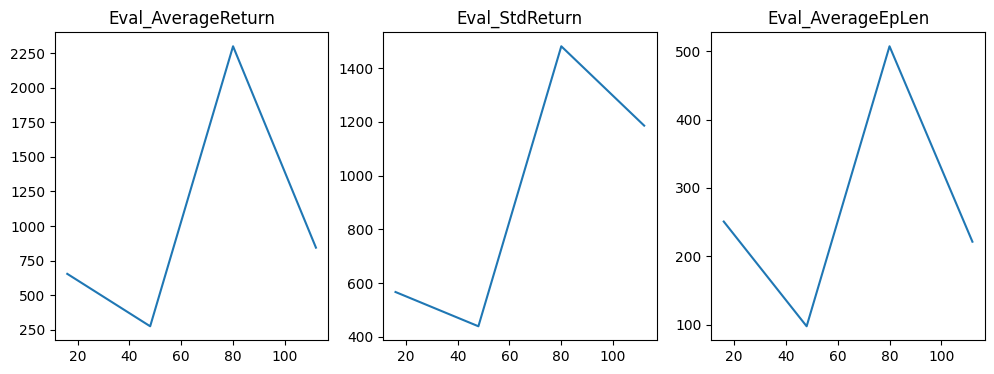

In [ ]:
import matplotlib.pyplot as plt

metrics_names = ["AverageReturn", "StdReturn", "AverageEpLen"]



types = ["Eval"]

for i, key in enumerate(metrics_names):
    for j, type in enumerate(types):
        curr_key = f"{type}_{key}"
        stats = [elem[curr_key] for elem in train_stats]
        ax[i].plot(train_steps, stats)
        ax[i].set_title(curr_key)

## Dagger

In [2]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  #@markdown expert data
  expert_policy_file = 'cs285/policies/experts/Walker2d.pkl' #@param
  expert_data = 'cs285/expert_data/expert_data_Walker2d-v4.pkl' #@param
  env_name = 'Walker2d-v4' #@param ['Ant-v4', 'Walker2d-v4', 'HalfCheetah-v4', 'Hopper-v4']
  exp_name = 'bc_Walker' #@param
  do_dagger = True #@param {type: "boolean"}
  return_log = True
  ep_len = 1000 #@param {type: "integer"}
  save_params = False #@param {type: "boolean"}

  num_agent_train_steps_per_iter = 1000 #@param {type: "integer"})
  n_iter = 10 #@param {type: "integer"})

  #@markdown batches & buffers
  # batch_size_initial = 2000 #@param {type: "integer"})
  batch_size = 1000 #@param {type: "integer"})
  eval_batch_size = 5000 #@param {type: "integer"}
  train_batch_size = 100 #@param {type: "integer"}
  max_replay_buffer_size = 1000000 #@param {type: "integer"}

  #@markdown network
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}
  learning_rate = 5e-3 #@param {type: "number"}

  #@markdown logging
  video_log_freq = -1 #@param {type: "integer"}
  scalar_log_freq = 1 #@param {type: "integer"}

  #@markdown gpu & run-time settings
  no_gpu = True #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

args = Args()

In [23]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'  # The autograder uses the prefix `q2_`
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'  # The autograder uses the prefix `q1_`
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/cs285_f2023/hw1/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [25]:
log = run_training_loop(args)

########################
logging outputs to  /content/cs285_f2023/hw1/data\q2_bc_Walker_Walker2d-v4_29-03-2025_22-17-56
########################
GPU not detected. Defaulting to CPU.
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Replay buffer size:  2000

Training agent using sampled data from replay buffer...

Beginning logging procedure...

2
Eval_AverageReturn : 1299.2783203125
Eval_StdReturn : 1307.7279052734375
Eval_MaxReturn : 4832.4814453125
Eval_MinReturn : 211.5633544921875
Eval_AverageEpLen : 316.625
Train_AverageReturn : 5383.310325177668
Train_StdReturn : 54.15251563871789
Train_MaxReturn : 5437.462840816386
Train_MinReturn : 5329.1578095389505
Train_AverageEpLen : 1000.0
Training Loss : -400.03948974609375
Train_EnvstepsSoFar : 0
TimeSinceStart : 2.953664541244507
Initial_DataCollection_AverageReturn : 5383.310325177668
Done logging...




********** Iteration 1 **

In [31]:
import numpy as np

iterations = np.arange(len(log))
mean_arr = [elem["Eval_AverageReturn"] for elem in log]
std_arr = [elem["Eval_StdReturn"] for elem in log]

train_arr = [log[0]["Train_AverageReturn"]]*len(mean_arr)
train_std = [log[0]["Train_StdReturn"]]*len(std_arr)

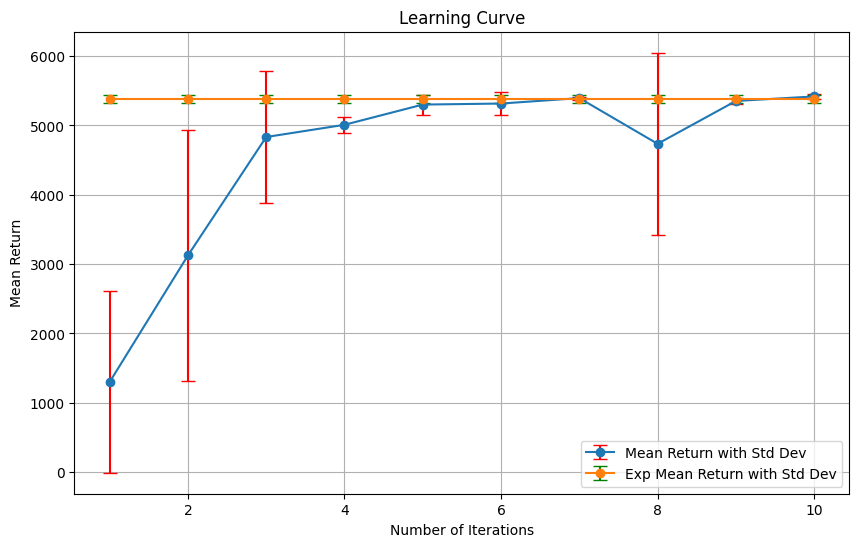

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Number of iterations
iterations = np.arange(1, len(mean_arr) + 1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.errorbar(iterations, mean_arr, yerr=std_arr, fmt='-o', ecolor='red', capsize=5, label='Mean Return with Std Dev')
plt.errorbar(iterations, train_arr, yerr=train_std, fmt='-o', ecolor='green', capsize=5, label='Exp Mean Return with Std Dev')

# Adding labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Return')
plt.title('Learning Curve')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()